# Calulating spectrum and plotting the same for different signal

In [9]:
%matplotlib inline

In [12]:
# File: showfun.py
# "show" functions like showft, showpsd, etc
from pylab import *
def showft(tt, xt, ff_lim):
    """
    Plot (DFT/FFT approximation to) Fourier transform of x(t)
    Displays magnitude |X(f)| either linear and absolute or
    normalized (wrt to maximum value) in dB. Phase of X(f) is
    shown in degrees.
    >>>>> showft(tt, xt, ff_lim) <<<<<
    where tt: time axis (increments Ts=1/Fs) for x(t)
    xt: sampled CT signal x(t))
    ff_lim = [f1,f2,llim]
    f1: lower frequency limit for display
    f2: upper frequency limit for display
    llim = 0: display |X(f)| linear and absolute
    llim > 0: same as llim = 0 but phase is masked
    (set to zero) for |X(f)| < llim
    llim < 0: display 20*log_{10}(|X(f)|/max(|X(f)|))
    in dB with lower display limit llim dB,
    phase is masked (set to zero) for f
    with magnitude (dB, normalized) < llim
    """
    # ***** Prepare x(t), swap pos/neg parts of time axis *****
    N = len(tt) # Blocklength of DFT/FFT
    Fs = int((N-1)/float(tt[-1]-tt[0])) # Sampling rate
    ixp = where(tt>=0)[0] # Indexes for t>=0
    ixn = where(tt<0)[0] # Indexes for t<0
    xt =hstack((xt[ixp],xt[ixn]))

    # ***** Compute X(f), make frequency axis *****
    Xf = fft(xt)/float(Fs) # DFT/FFT of x(t),
    # scaled for X(f) approximation
    ff = Fs*arange(N)/float(N) # Frequency axis
    # ***** Compute |X(f)|, arg[X(f)] *****
    absXf = abs(Xf) # Magnitude |X(f)|
    argXf = angle(Xf) # Phase arg[X(f)]
 
    # ***** Plot magnitude/phase *****
    get_ipython().magic('matplotlib inline')
    f1 = figure()
    af11 = f1.add_subplot(211)
    af11.plot(ff,absXf) # Plot magnitude
    af11.grid()
    af11.set_ylabel('|X(f)|')
    strgt = 'FT Approximation, $F_s=$' + str(Fs) + ' Hz'
    strgt = strgt + ', N=' + str(N)
    strgt = strgt + ', $\Delta_f=$' + str(Fs/float(N)) + ' Hz'
    af11.set_title(strgt)
    af12 = f1.add_subplot(212)
    af12.plot(ff,180/pi*argXf) # Plot phase in degrees
    af12.grid()
    af12.set_ylabel('arg[X(f)] [deg]')
    af12.set_xlabel('f Hz')
    show()
                

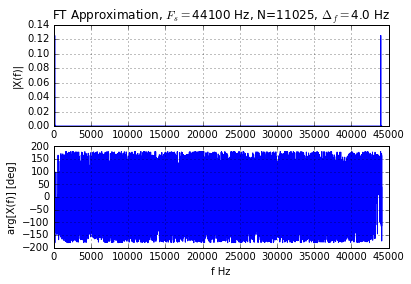

In [15]:
# Given Data
fs = 44100
fa, fb = 140, 160
tlen = 0.25
tt = arange(0,round(fs*tlen))/float(fs)
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)    # Given wave
showft(tt,xt,[-200,200,1e-3])

# This is all correct in principle but not readable, so we are modifying the showfun function and try to withdraw it

In [5]:
# %load showfun.py
# File: showfun.py
# "show" functions like showft, showpsd, etc
from pylab import *
def showft(tt, xt, ff_lim):
	"""
	Plot (DFT/FFT approximation to) Fourier transform of x(t)
	Displays magnitude |X(f)| either linear and absolute or
	normalized (wrt to maximum value) in dB. Phase of X(f) is
    	shown in degrees.
    	>>>>> showft(tt, xt, ff_lim) <<<<<
    	where tt:time axis (increments Ts=1/Fs) for x(t)
            xt:sampled CT signal x(t))
            ff_lim = [f1,f2,llim]
            f1:lower frequency limit for display
            f2:upper frequency limit for display
            llim = 0: display |X(f)| linear and absolute
            llim > 0: same as llim = 0 but phase is masked
                      (set to zero) for |X(f)| < llim
            llim < 0: display 20*log_{10}(|X(f)|/max(|X(f)|))
                      in dB with lower display limit llim dB,
                      phase is masked (set to zero) for f
                      with magnitude (dB, normalized) < llim
    	"""
	# ***** Prepare x(t), swap pos/neg parts of time axis *****
	n = len(tt)
	fs = int((n-1)/float(tt[-1]-tt[0])) 	# Sampling rate
	ixp = where(tt>=0)[0]			# Indexes for t>=0
	ixn = where(tt<0)[0]			# Indexes for t<0
	tlen = tt[-1]	
	xt = hstack((xt[ixp],xt[ixn])) 		# Swap pos/neg time axis parts
	llim = ff_lim[2]
	f11, f12 = ff_lim[0], ff_lim[1]
	
	
	# ***** Compute X(f), make frequency axis *****
	Xf = fft(xt)/float(fs)			# DFT/FFT of x(t),
	
	# scaled for X(f) approximation
	ff = fs*arange(-round(n/2),round(n/2)+1)/float(n) 		# Frequency axis
	# ***** Compute |X(f)|, arg[X(f)] *****
	absXf = abs(Xf)				# Magnitude |X(f)|
	absXf_pos = absXf[0:round(n/2)+1]     # getting the range of absXf for positive half
	absXf_neg = array(list(reversed(absXf_pos[1:])))     # getting the range of absXf for negative range
	absXf = hstack((absXf_neg,absXf_pos))      # making absXf to draw it properly

	argXf = list(angle(Xf))			# Phase arg[X(f)]
	argXf_pos = argXf[0:round(n/2)+1:]         # getting the range of argXf for positive half
	argXf_neg = argXf[round(n/2)+1:]           # getting the range of argXf for negative range
	argXf = hstack((array(argXf_neg),array(argXf_pos)))         # making argXf to draw it properly

    # for calculating argXf and absXf for llim < 0 (in Decibels)

	if llim < 0:
		absXf = list(20*log10((absXf+1e-20)/max(absXf)))
		ind_absXf = [llim/i if i < llim else i/i if i != 0 else 1.0 for i in list(absXf)]   # making a list with 1s and 0s for absXf
		ind_argXf = [i*0 if i < llim else i/i if i!=0 else 1.0 for i in list(absXf)]         # making a list with 1s and 0s for argXf
		absXf = array([a*b for (a,b) in zip(absXf,ind_absXf)])           # getting new absXf such that no elements is less than llim dB
		argXf = array([a*b for (a,b) in zip(argXf,ind_argXf)])     # removing the noise from argXf considering the DB value of absXf
	else:
		ind_argXf = [i*0 if -llim < i < llim else i/i for i in list(absXf)]
		argXf = array([a*b for (a,b) in zip(argXf,ind_argXf)])   # removing the noise from argXf considering

	
	# ***** Plot magnitude/phase *****
	f1 = figure()
	i_start = int(round(n/2)+f11*tlen) 
	i_end = int(round(n/2)+f12*tlen)
	af11 = f1.add_subplot(211)
	af11.plot(ff[i_start:i_end],absXf[i_start:i_end])
	af11.grid()
	if llim >= 0:
		af11.set_ylabel('|X(f)|')
	else:
		af11.set_ylabel('|X(f)| in dB')
	strgt = 'FT Approximation, $F_s=$' + str(fs) + ' Hz'
	strgt = strgt + ', N=' + str(n)
	strgt = strgt + ', $\Delta_f$={0:3.2f}'.format(fs/float(n)) + ' Hz'
	af11.set_title(strgt)
	af12 = f1.add_subplot(212)
	af12.plot(ff[i_start:i_end],180/pi*argXf[i_start:i_end]) 		# Plot phase in degrees
	af12.grid()
	af12.set_ylabel('arg[X(f)] [deg]')
	af12.set_xlabel('f [Hz]')
	show()


In [6]:
%run showfun.py

In [7]:
# Given Data
fs = 44100
fa, fb = 140, 160
tlen = 0.25
tt = arange(0,round(fs*tlen))/float(fs)
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)    # Given wave

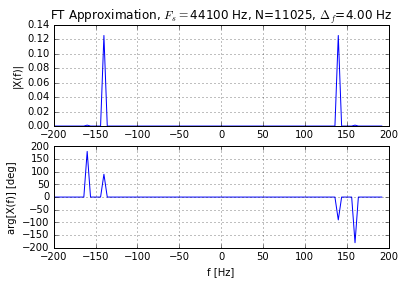

In [10]:
showft(tt,xt,[-200,200,1e-3])

# We calculated the frequency characteristics of the given wave and plotted above. The peak at +fb and -fb should be mathematically equal to 0.5 (a delta function with peak of 0.5). But here the area under the curve should be equal to 0.5 which we can see as delta f (fs/n = 4) multipled by 0.125 is 0.5

In [16]:
%run showfun.py

In [17]:
# Given Data
fs = 44100
fa, fb = 140, 160
tlen = 0.25
tt = arange(0,round(fs*tlen))/float(fs)
xt = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)    # Given wave

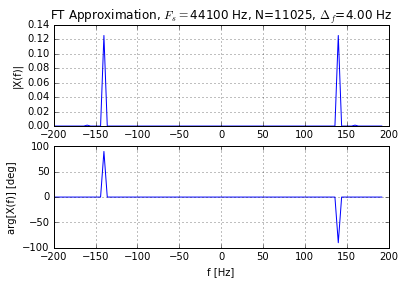

In [20]:
showft(tt,xt,[-200,200,1e-3])

# We can see from the above graphs for bot the signal  xt = sin(Z)-0.01*cos(Z) and xt = sin(Z)+0.01*cos(Z) it's hard to see the cosine component in the spectrum. So, next we will try to plot the normalized absolute value in decibel.

In [19]:
%run showfun.py

In [21]:
# Given Data
fs = 44100
fa, fb = 140, 160
tlen = 0.25
tt = arange(0,round(fs*tlen))/float(fs)
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt) 

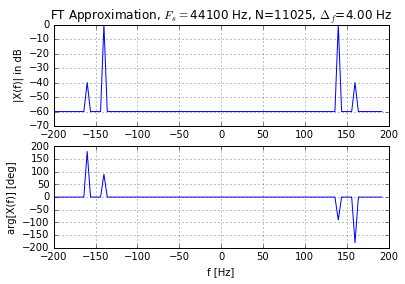

In [22]:
showft(tt,xt,[-200,200,-60])

# In the above graph plotted in decibel, it is wasy to see the cosine component.

Enter the text: Test
Enter the sampling frequency you need10000
Enter the number of samples you required1000


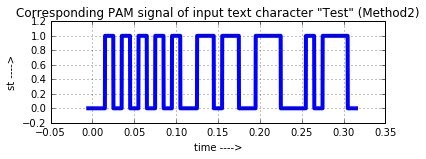

In [82]:
# %load text_to_pcm.py
# This program will accpet the text string and convert
# it into flat top PAM s(t) signal.

from pylab import *
from ascfun import *
import wavfun as wf

txt = input("Enter the text: ")
fs= input("Enter the sampling frequency you need")
n = input("Enter the number of samples you required")
fs=int(fs)
n=int(n)
fb = 100    # as required in the question

tb = 1/float(fb)

dn = asc2bin(txt)   # as2bin will change the txt to stream of bits
n=len(dn) 	# length of dn sequence
ixl = int(round(-0.5*tb*fs)) 	# the starting left index of the st
ixr = int(round((n-0.5)*fs*tb))	# the right most index of the st
tt = arange(ixl,ixr)/float(fs)  # time axis for st

dnn = [repeat(c,round(fs*tb)) for c in dn]    # repeating the one or zero as many samples are there in one pulse
st=[]
for i in dnn:                  # making of st signal
	st = st + list(i)
st=array(st)
tt=array(tt)
subplot(212)
plot(tt, st, linewidth=4)
ylim((-0.2,1.2))
grid()
xlabel('time ---->')
ylabel('st ---->')
title('Corresponding PAM signal of input text character "%s" (Method2)' %txt)

show()


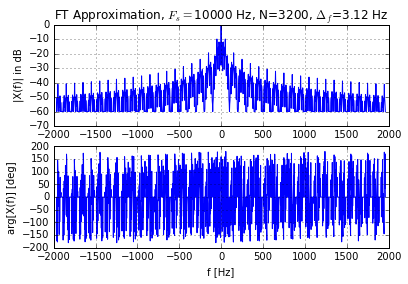

In [83]:
showft(tt,st,[-2000,2000,-60])

# We can see PAM wave is constructed from the python script "pcm_to_mt.py" with pulse width 0.01 (as required) and fs = 10000 & number_of_samples = 1000  (to get pulse width 0.01) and then from the showft function the spectrum was plotted